In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

import seaborn as sns
import pandas as pd
import scipy.io

import metric_learn
from metric_learn import MMC_Supervised, MMC, NCA, LMNN

import sklearn
from sklearn import decomposition, manifold, cluster, datasets
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, MDS
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import fetch_openml, fetch_lfw_people, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, load_digits

from time import time

# 1. Metric Learning
----------------
## a. Mahalanobis Metric Learning for Clustering (MMC)
----------------
### MMC (max_iter = 100, convergence_threshold = 0.001)
* minimizes the sum of squared distances between similar examples
* enforces the sum of distances between dissimilar examples to be greater than a certain margin
* #### Arguments: 
 1.         max_iter: maximum number of iteration
 2.         convergence_threshold: maximum difference between 2 consecutive values of iteration to be considered convergence
* #### Methods: (on the MMC object)
 *         fit(pairs, y): learn the MMC model
 *         pairs: 2D array of indices of pairs if the metric learner uses a preprocessor
 *         y: Labels of constraints. Should be -1 for dissimilar pair, 1 for similar
 *         fit_transform(X): fit the model for dataset X and transform it
 *         transform(X): apply the metric transformation
 *         get_params(): get parameters for this estimator
 *         metric(): compute the Mahalanobis matrix from the transformation matrix

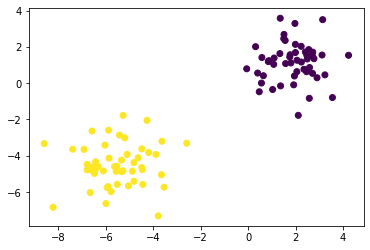

In [2]:
n_samples = 40
random_state = 170
X, y = make_blobs(centers = 2)

# First, we obtain labels (0 or 1) for this data set
### YOUR CODE HERE (Fill in the "None")
# Hint: variable "y_pred" must be the cluster indices
kmeans = KMeans(n_clusters = 2)
y_pred = kmeans.fit_predict(X)
### END OF YOUR CODE

# Visualization of Kmeans clustering
plt.scatter(X[:,0], X[:,1], c = y_pred)
plt.show()

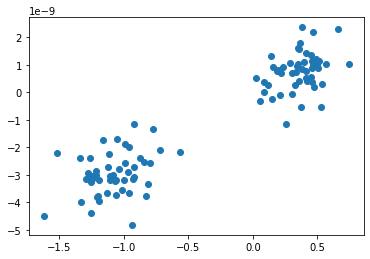

In [3]:
# Obtain the labels:
### YOUR CODE HERE (Fill in the "None")
labels = kmeans.labels_
### END OF YOUR CODE

# Find the indices corresponding to each label (0 or 1)
A = np.where(kmeans.labels_ == 1)
B = np.where(kmeans.labels_ == 0)

label_1 = A[0]
label_0 = B[0]

# Now, data corresponding to indices stored in A are SIMILAR to each other
# data corresponding to indices stored in A and B are DISSIMILAR to each other

# Perform MMC transformation
### YOUR CODE HERE
# Hint: define a MMC object of 200 iterations
mmc = MMC(max_iter=200)
# Hint: fit it with pairs of [[X[a], X[b]], [X[c], X[d]]], each of (a,b,c,d) is a sub-array of either label_0 or label_1 
# Hint: a,b,c,d must all be of the same size
ind_1 = np.concatenate((label_1[0:4], label_1[10:14]), axis=None)
ind_2 = np.concatenate((label_1[5:9], label_0[0:4]), axis=None)
pair = [X[ind_1], X[ind_2]]
pair = np.stack(pair, axis=1)
mmc.fit(pair, [1]*4+[-1]*4)
### END OF YOUR CODE

# Transform the data using the MMC we just fitted
### YOUR CODE HERE
X_transformed = mmc.transform(X)
### END OF YOUR CODE

# Visualize the transformed data
plt.scatter(X_transformed[:,0], X_transformed[:,1])
plt.show()

# 1. Metric Learning
----------------
## b. Local Fisher Discreminant Analysis (LFDA)
----------------
### NCA(num_dims = None, max_iter = 100, tol = None)
* #### Arguments:
 1.           num_dims : embedidng dimensionality. If None, set to n_features at fit() time
 2.          max_iter: maximum number of iterations done by the algorithm
 3.           tol: convergence tolerance for the optimization
* #### Methods:
 *          fit(X, y): fit the NCA model for the data X, scalar labels y
 *          fit_transform(X, y=None): Fit to data, then transform it
 *          get_params(): get parameters for this estimator
 *          metric(): compute the Mahalanobis matrix from the transformation matrix
 *          transform(X): apply the metric transformation for dataset X
 *          transformer(): compute the transformation matrix from the Mahalanobis matrix

In [ ]:
# EXERCISE:

# Ex.3.b.1: Visualization of NCA transformation on the data

# Generate the data
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# Ex.3.b.1: Visualization of NCA transformation on the data (cont)

# NCA require labels
# The visualization suggests that labels could be obtained quite accurately using Kmeans algorithm

# Compute K-means clustering
### YOUR CODE HERE (Fill in the "None")
# Hint: variable "y_pred" must the be cluster indices
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(X)
### END OF YOUR CODE

# Perform NCA transformation on the data
### YOUR CODE HERE (Fill in the "None")
# Hint: define a NCA object, 1000 iterations
nca = NCA(max_iter=1000)
# Hint: what should we pass as arguments of the fit() function?
nca.fit(X, y_pred)
# Hint: use the NCA we just fitted to transform data X
X_transformed = nca.transform(X)
### END OF YOUR CODE

# Visualize the data after transformation
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.show()

In [ ]:
# Ex 3.b.2: Effects of NCA on Kmeans

# The aim of this exercise is to see the effect of NCA on data and performance of Kmeans clustering

# Generate the data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(72)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# Visualize the data
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
# Ex 3.b.2: Effects of NCA on Kmeans (cont)

# Perform Kmeans clustering on the data
### YOUR CODE HERE (Fill in the "None")
# Hint: variable "y_pred" must the be cluster indices
kmeans = KMeans(n_clusters = 5)
y_pred = kmeans.fit_predict(X)
### END OF YOUR CODE

# Visualize the result of Kmeans clustering
plt.scatter(X[:,0], X[:,1], c= y_pred)
plt.show()

In [ ]:
# Ex 3.b.2: Effects of NCA on Kmeans (cont)

# Kmeans clustering does not seem to perform well on this dataset
# Let's see if NCA can improve the performance
# We saw previously that with this kind of dataset, DBSCAN could overcome Kmeans in terms of performance
# Let's obtain the labels, for NCA, by DBSCAN

### Standardize features by removing the mean and scaling to unit variance
X = StandardScaler().fit_transform(X)

# Perform DBSCAN clustering
### YOUR CODE HERE (Fill in the "None"). 2 lines of code
# Hint: variable "y_pred" must be the cluster indices.
dbscan = DBSCAN(eps=0.123, min_samples = 2)
y_pred = dbscan.fit_predict(X)
### END OF YOUR CODE

# Perform NCA transformation based on the labels we have just obtained
### YOUR CODE HERE (Fill in the "None")
# Hint: set 1000 iterations
nca = NCA(max_iter=1000)
nca.fit(X, y_pred)
### END OF YOUR CODE

# Apply the fitted NCA to transform our data
### YOUR CODE HERE (Fill in the "None")
X_transformed = nca.transform(X)
### END OF YOUR CODE

# Visualize the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred)
plt.show()

In [ ]:
# Ex 3.b.2: Effects of NCA on Kmeans (cont)

# The transformed data looks more suitable for KMeans clustering than the original data

# Perform KMeans clustering on the transformed data
### YOUR CODE HERE (Fill in the "None").
# Hint: variable "y_pred" must be the cluster labels
kmeans = KMeans(n_clusters = 5)
y_pred = kmeans.fit_predict(X_transformed)
### END OF YOUR CODE

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y_pred)
plt.show()

In [ ]:
# QUESTION: Can you see that NCA has improved the performance of Kmeans?
# ANSWER: It is very clear in the visualization.

# 1. Metric Learning
--------------
## c. Large Margin Nearest Neighbor (LMNN)
--------------
### LMNN(k=3, min_iter=50, max_iter=1000, learn_rate=1e-07, regularization=0.5, convergence_tol=0.001, use_pca=True)
*  Learns a Mahanalobis distance metric in the kNN classificaiton setting using semidefinite programming
* #### Arguments:
 *          k : number of neighbors to consider
 *          min_iter: minimum number of iterations
 *          max_iter: maximum number of iterations
 *          learn_rate: learning rate
 *          regularization: weighting of pull and push terms, with 0.5 meaning equal weight.
* #### Methods:
 *           fit(X,y): fit the LMNN model for dataset X and labels y
 *          fit_transform(X, y): fit the LMNN model for dataset X and labels y, then transform C
 *          transform(X): after an LMNN object is fitted, call this function to transform dataset X
 *          get_params(): get parameters for this estimator

In [4]:
# EXERCISE
# Ex 3.c.1: Basic LMNN
import numpy as np
from metric_learn import LMNN
from sklearn.datasets import load_iris

### Load iris data, a data with labels
iris_data = load_iris()
X = iris_data['data']
Y = iris_data['target']

# Perform LMNN fitting
### YOUR CODE HERE (Fill in the "None")
# Hint: we want to consider 10 neighbors, learning rate 1e-6, maximum 100 iterations
lmnn = LMNN(k = 10, learn_rate = 1e-6, max_iter = 100)
# Hint: after this line, we want lmnn to fit on the Iris data
lmnn.fit(X, Y)
### END OF YOUR CODE

LMNN(k=10, learn_rate=1e-06, max_iter=100)

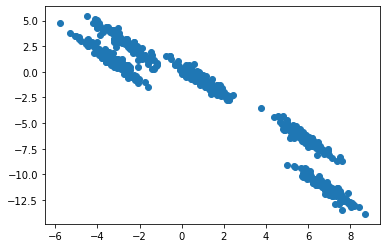

In [5]:
# Ex 3.c.2: Effects of LMNN on Kmeans

# Let's consider a dataset in which Kmeans does not work well initially
# But after applying LMNN, Kmeans performance is improved

# Data (5 clusters)
X, y_true = make_blobs(random_state=170, n_samples=600, centers = 5)
#X = X[:, ::-1] # flip axes for better plotting
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X_sketched = np.dot(X, transformation)

# Visualize
plt.scatter(X_sketched[:,0], X_sketched[:,1])
plt.show()

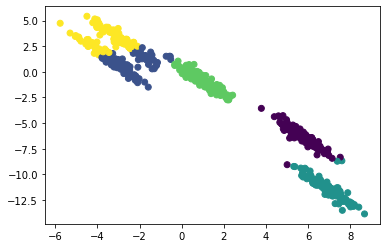

In [6]:
# Ex 3.c.2: Effects of LMNN on Kmeans (cont)

# Based on the visualization, we suspect that data can be formed into 5 clusters
# We saw that with this kind of sketched dataset, DBSCAN appeared to perform better than Kmeans
# Let's perform Kmeans and DBSCAN clustering on this dataset

# Computer Kmeans clustering
### YOUR CODE HERE (Fill in the "None")
# Hint: variable "y_pred_kmeans" should be the labels of clustering
kmeans = KMeans(n_clusters = 5)
y_pred_kmeans = kmeans.fit_predict(X_sketched)
### END OF YOUR CODE

#Visualization
plt.scatter(X_sketched[:, 0], X_sketched[:, 1], c=y_pred_kmeans)
plt.show()

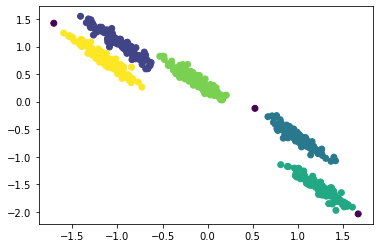

In [7]:
# Ex 3.c.2: Effects of LMNN on Kmeans (cont)

X_sketched_dbscan = StandardScaler().fit_transform(X_sketched)
# Computer DBSCAN clustering
### YOUR CODE HERE (set 'eps' = 0.123)
dbscan = DBSCAN(eps=0.123, min_samples = 2)
y_pred_dbscan = dbscan.fit_predict(X_sketched_dbscan)
### END OF YOUR CODE

# Visualization
plt.scatter(X_sketched_dbscan[:, 0], X_sketched_dbscan[:, 1], c=y_pred_dbscan)
plt.show()

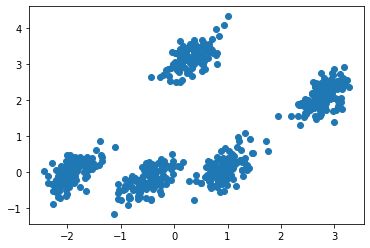

In [8]:
# Ex 3.c.2: Effects of LMNN on Kmeans (cont)

# We suspect that DBSCAN clustering is more accurate
# Therefore, let's use y_pred_dbscan (DBSCAN cluster indices) for perform LMNN metric learning

# Perform LMNN on X_sketched, using labels from DBSCAN clustering performed above
### YOUR CODE HERE (Fill in the "None")
# Hint: set k = 3, learning rate = 1e-6, maximum 100 iterations
lmnn = LMNN(k = 3, learn_rate = 1e-6, max_iter = 100)
lmnn.fit(X_sketched, y_pred_dbscan)
### END OF YOUR CODE

# Transform the data using the fitted Metric
### YOUR CODE HERE (Fill in the "None")
X_transformed = lmnn.transform(X_sketched)
### END OF YOUR CODE

# Visualize the effects of LMNN on the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.show()

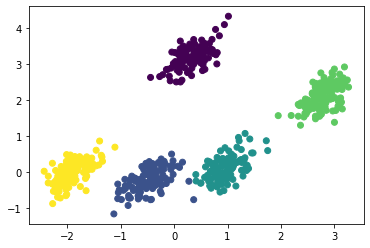

In [9]:
# Ex 3.c.2: Effects of LMNN on Kmeans (cont)

# Perform KMeans on the newly transformed set
### YOUR CODE HERE (Fill in the "None")
kmeans = KMeans(n_clusters = 5)
y_pred_kmeans = kmeans.fit_predict(X_transformed)
### END OF YOUR CODE

# Visualize the effects of LMNN on KMeans
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c = y_pred_kmeans)
plt.show()

In [ ]:
### QUESTION: Compare the performances of Kmeans on the original and transformed data.

### Reference:
 1. https://metric-learn.github.io/metric-learn/index.html